<a href="https://colab.research.google.com/github/thisalmadu/ML-Project/blob/main/Cal_data_set_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Code to fetch housing data


In [2]:
import os
import tarfile
import urllib

download_root = "https://raw.githubusercontent.com/ageron/handson-m12/master/"
#download_root = "https://github.com/mohitgupta-omg/Kaggle-California-Housing-Prices"
housing_path =os.path.join("datasets","housing")
housing_url = download_root+ "datasets/housing/housing.tgz"

In [3]:
def fetch_housing_data(hu=housing_url, hp =housing_path):
  os.makedirs(hp,exist_ok=True)
  tgz_path = os.path.join(hp,"housing.tgz")
  urllib.request.urlretrieve(hu,tgz_path)
  housing_tgz = tarfile.open(tgz_path)
  housing_tgz.extractall(path=housing_path)
  housing_tgz.close()

Callinig the above function to create "dataset/housing" directory in the worksplace and downlad "housing.tgz" file and extarct the housing.csv file

In [4]:
import pandas as pd
import numpy as np
csv_file_path = "datasets/calfornia_housing.csv"

In [5]:
# loading data
def load_housing_data(csv_path):
  #csv_path = os.path.join(data_path,cfile)
  return pd.read_csv(csv_path)

In [6]:
housing= load_housing_data(csv_file_path)
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [7]:
housing.info()  # gives a description of the attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing["ocean_proximity"].value_counts() # see the othe values in "ocean_proximity" feature and count of each category

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
housing.describe()  # gives some descriptive statistics of the features(null values are ignored)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


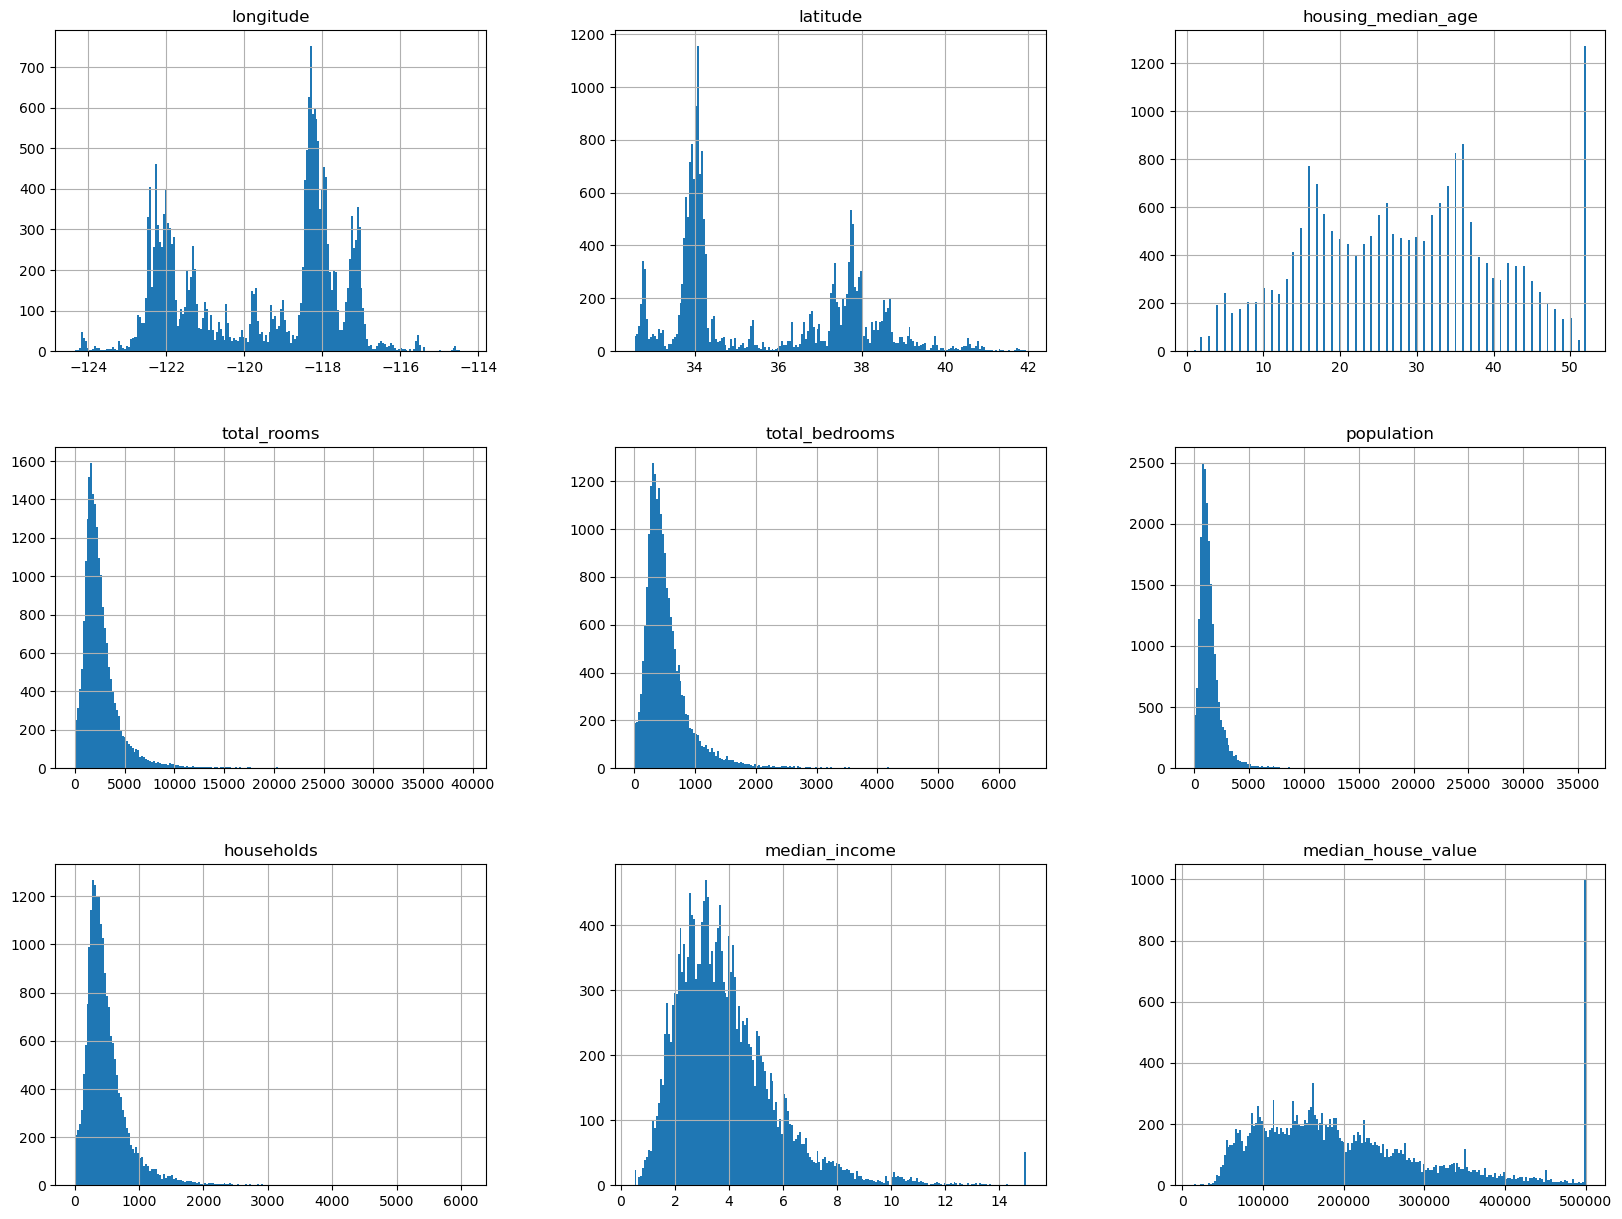

In [10]:
import matplotlib.pyplot as plt
housing.hist(bins=200,figsize=(20,15)) # show the data in a histogram
plt.show()

# Create a Test set
Creating test set is theritically simple. Pick some instances randomly, typically 20% of the data set (or less if your data set is too large). And keep them aside => 80% for the training set

In [11]:
from IPython.testing import test
def split_train(data, test_rat):
  # np.random.seed(42) => always generate same shuffled indices
  shuffled_indices = np.random.permutation(len(data))
  test_set_size = int(len(data)* test_rat)
  test_ind = shuffled_indices[:test_set_size]
  train_ind = shuffled_indices[test_set_size:]
  return data.iloc[train_ind], data.iloc[test_ind]

In [12]:
train_set,test_set = split_train(housing,0.2)

In [13]:
len(train_set)  # 80% as training data

16512

In [14]:
train_set.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1134,-121.63,39.75,37.0,1296.0,296.0,569.0,257.0,1.8616,70500.0,INLAND
5053,-118.34,34.01,38.0,2318.0,735.0,1407.0,702.0,1.6187,266700.0,<1H OCEAN
13436,-117.44,34.09,24.0,3477.0,831.0,2541.0,753.0,2.3682,97400.0,INLAND
18655,-121.97,36.98,17.0,2813.0,497.0,1337.0,477.0,3.7083,252400.0,NEAR OCEAN
19813,-119.26,36.61,33.0,560.0,90.0,310.0,113.0,2.5417,118800.0,INLAND


In [15]:
len(test_set) # 20% as test data

4128

And there is a possibility to split the data set by the index as well. but here this housing data does not have a index column. Therefore make a index column and split by the index is also possible here

In [16]:
from zlib import crc32
def test_set_check(identifier, test_rat):
    return crc32(np.int64(identifier)) & 0xffffffff < test_rat*2**32

In [17]:
housing_with_id = housing.reset_index() # adds an 'index'column

In [18]:
housing_with_id.head(5)

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [19]:
def split_train_test_by_index(data, test_rat, id_col):
    ids = data[id_col]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_rat))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [20]:
in_train_set,in_test_set = split_train_test_by_index(housing_with_id,0.2,"index")

In [21]:
in_train_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
6,6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY


if the row index is a unique identifier it must be maade sure that new data gets append to the end of the data se and no rows ever gets deleted. If this is not possible you have to build a unique identifier. For example here latitude and longitude of a district possibly stable for few years so you can combine them and make a unique ID

In [22]:
housing_with_id["id"] = housing["longitude"]*1000+housing["latitude"]
train_set_id, test_set_id = split_train_test_by_index(housing_with_id,0.2,"id")

In [23]:
train_set_id.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15


## Split Data into multiple subsets

**Skit-Learn** provides some functions to split a data set into multiple subsets. simplest one is **train_test_split()**, which is almost the same as above defined **split_train_test()** with a couple of additional features


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
train_set_new, test_set_new = train_test_split(housing, test_size=0.2, random_state=42)

In [26]:
train_set_new.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


# Stratified/ Random Sampling

suppose the median income will be a very important attribute to predict median housing price. It is vital to ensure that thetest set is representative of the various categories of incomes in the whole dataset. Since the median income is a continuous numerical valur first we create a "income category attribute" to categorize some median income values to a certain stratum. By looking at the figure it can be seen that the median vaues are clustered around 1.5 -6. And there are few goes even beyond 6. The following command "pd.cut()" enables to create this sort of a income category attribute with 5 categories.

In [27]:
housing["income_cat"] = pd.cut(housing["median_income"],  # create the new categorical attribute "income_cat"
                              bins=[0., 1.5, 3.0, 4.5, 6., np.inf], # label 1 : 0-1.5, label 2: 1.5-3.0, and so on ...
                              labels=[1, 2, 3, 4, 5])      # with five categories

<AxesSubplot:>

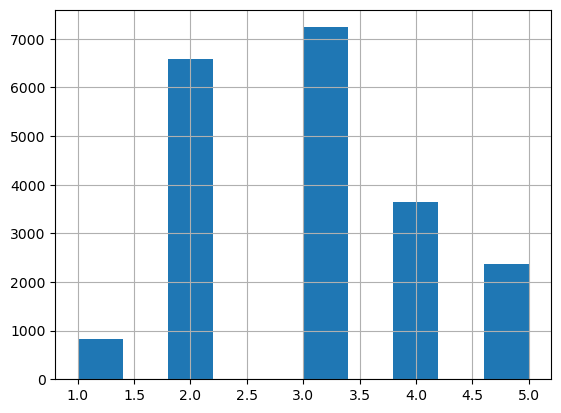

In [28]:
housing["income_cat"].hist()

It is important to have enough instances on each of this stratum, otherwise the estimate of a stratum's importance may be biased (means should not have too many strata, and each strata should be large enough)

Now stratified sampling is possible based on the "income_cat" with Scikit-Learn's class "StratifiedShuffleSplit" 

In [29]:
from sklearn.model_selection import StratifiedShuffleSplit

In [30]:
str_split = StratifiedShuffleSplit(n_splits=1, test_size= 0.2, random_state= 42) # test_size = proportion of the dataset to include in the test split
# refer : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html
for train_ind, test_ind in str_split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_ind]
    strat_test_set = housing.loc[test_ind]

Seeing the proportions of each income category to make sure the stratified sampling was done correct

In [31]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set) # value_count = frequencies

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

Now we can do the same for the full data set("housing") and compare the results with stratified sampling set "strat_test_set" results

In [32]:
housing["income_cat"].value_counts()/len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

It is evident that our sampling method was successfull that it represents the whole set really well. And also the error of stratified sampling also can be calculated as follows:

In [33]:
strat_sample = strat_test_set["income_cat"].value_counts()/len(strat_test_set)
full_set = housing["income_cat"].value_counts()/len(housing)
strat_error = (strat_sample - full_set)/ full_set*100

In [34]:
strat_error

3   -0.013820
2   -0.015195
4    0.027480
5   -0.084674
1    0.364964
Name: income_cat, dtype: float64

And this results can also be checked against the "random sampling" as well. since we have already done the random sampling above just invoking the random sampled data:

In [35]:
train_rand, test_rand = train_test_split(housing, test_size=0.2, random_state=42) # random sampling

Now checking the propotions for the randomly sample as well

In [36]:
test_rand_prop = test_rand["income_cat"].value_counts()/len(test_rand["income_cat"])

In [37]:
test_rand_prop

3    0.358527
2    0.324370
4    0.167393
5    0.109496
1    0.040213
Name: income_cat, dtype: float64

In [38]:
# Checking the error on random sampling
(test_rand_prop - full_set)/ full_set*100

3    2.266446
2    1.732260
4   -5.056334
5   -4.318374
1    0.973236
Name: income_cat, dtype: float64

comparing this with the "strat_error" Its obvious to see that stratified sampling error is much less. But this analysis is based upon the fact that there is a strong categorical representation in the data set by the "median_income"

In [39]:
# At the end removing the "income_cat" attribute to make the data back on its original format
for set_ in (strat_train_set, strat_test_set ):
    set_.drop("income_cat", axis=1, inplace=True)

# Visualization of Data

In [40]:
# make a copy of the original data set (then no harm on the original training set)
housing = strat_train_set.copy()

## Visualizing Geographical data

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

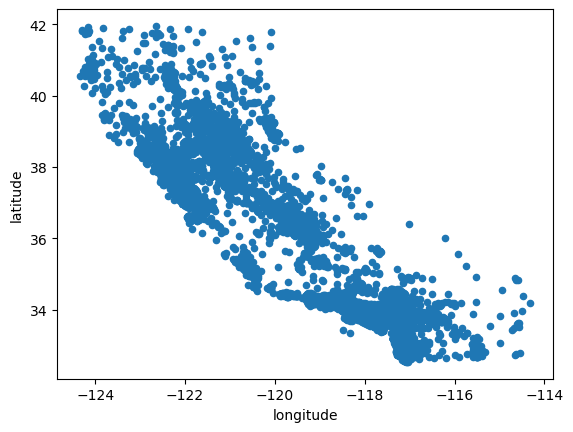

In [41]:
# creating a scatter plot of all districts to visualize the data
housing.plot(kind="scatter", x="longitude", y="latitude")

It is hard to see any particular pattern in the above scatter plot. Setting a parameter called "alpha"=0.1 makes it much easier to visualize the high density data points

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

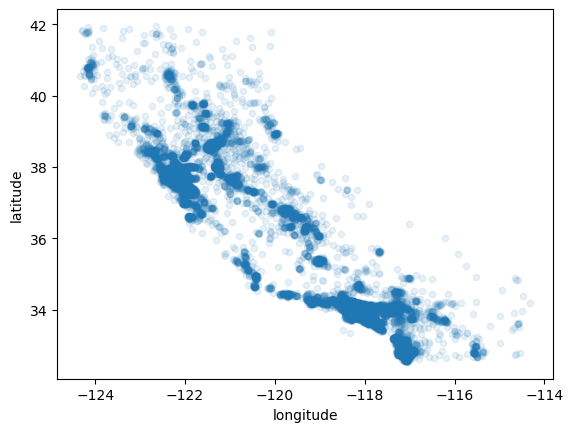

In [42]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

Using predefined color map, **s** for the (Jet) which ranges from blue (low value) to red (high value)

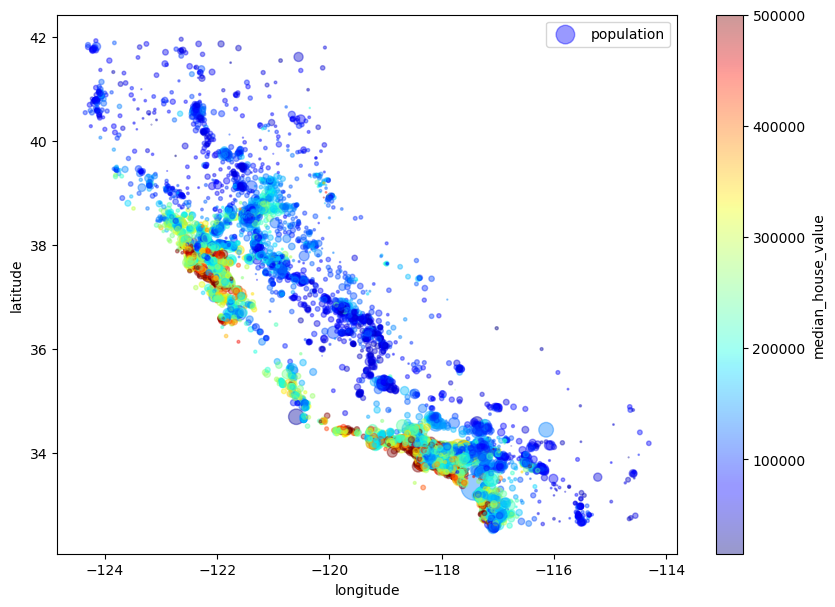

In [50]:
housing.plot(kind="scatter",x="longitude", y="latitude", alpha=0.4,s=housing["population"]/100, label="population", figsize=(10,7), c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

Above image consists of california housing prices: red is expensive, blue is cheap, larger circles indicate areas with a larger population